<a href="https://colab.research.google.com/github/mglavan07/HYDAC_Capacity_Forecasting_Models/blob/main/ClusterSiblings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if __name__ == "__main__":
  from google.colab import drive
  drive.mount('/content/drive')

  import sys
  sys.path.append('/content/drive/MyDrive/Colab')

Mounted at /content/drive


In [2]:
if __name__ == "__main__":
  import dataseparation as ds

In [3]:
# define a function to normalize features knowing there are severe outliers
def normalize_features(df):

    try:
        import pandas as pd

        # copy the original DataFrame
        norm = df.copy()

        # total quantity min-max scaled
        norm["Total Quantity"] = (df["Total Quantity"] - df["Total Quantity"].min()) / (df["Total Quantity"].max() - df["Total Quantity"].min())

        # total revenue min-max scaled
        norm["Total Revenue"] = (df["Total Revenue"] - df["Total Revenue"].min()) / (df["Total Revenue"].max() - df["Total Revenue"].min())

        # total cost min-max scaled
        norm["Total Cost"] = (df["Total Cost"] - df["Total Cost"].min()) / (df["Total Cost"].max() - df["Total Cost"].min())

        # return the new dataframe
        return norm

    # flag errors
    except KeyError:
        print(f"Error: not all columns located")
        return pd.DataFrame()
    except ModuleNotFoundError:
        print("Error: pandas is not installed.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred in normalization: {e}")
        return pd.DataFrame()

In [4]:
# define a 2D method to normalize
def normalize_features_2D(df):

    try:
        import pandas as pd

        # copy the original DataFrame
        norm = df.copy()

        # total quantity min-max scaled
        norm["Total Quantity"] = (df["Total Quantity"] - df["Total Quantity"].min()) / (df["Total Quantity"].max() - df["Total Quantity"].min())

        # total revenue min-max scaled
        norm["Total Revenue"] = (df["Total Revenue"] - df["Total Revenue"].min()) / (df["Total Revenue"].max() - df["Total Revenue"].min())

        # total cost scaling
        norm["Total Cost"] = (df["Total Cost"] - df["Total Cost"].min()) / (df["Total Cost"].max() - df["Total Cost"].min())

        # return the new dataframe
        return norm

    # flag errors
    except KeyError:
        print(f"Error: not all columns located")
        return pd.DataFrame()
    except ModuleNotFoundError:
        print("Error: pandas is not installed.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

In [5]:
# define a function to run a DBSCAN
def dbscan_cluster(norm_data, param1_eps, param2_msamp):

    try:
        # import machine learning packages
        import pandas as pd
        import numpy as np
        from sklearn.cluster import DBSCAN

        # feature matrix (Nx3)
        X = norm_data[['Total Quantity', 'Total Revenue', 'Total Cost']]

        # neighborhood radius of and min samples to be optimzed
        db = DBSCAN(eps = param1_eps, min_samples = param2_msamp)
        clusters = db.fit_predict(X)

        # append the resulting column vector (Nx1)
        norm_data['Cluster'] = clusters

        # return the updated dataframe
        return norm_data

    # flag errors
    except KeyError:
        print(f"Error: not all columns located")
        return pd.DataFrame()
    except ModuleNotFoundError:
        print("Error: libraries is not installed. sklearn, pandas, numpy required")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred in clustering: {e}")
        return pd.DataFrame()

In [6]:
# define a function to run a DBSCAN in 2D
def dbscan_cluster_2D(norm_data, param1_eps, param2_msamp):

    try:
        # import machine learning packages
        import pandas as pd
        import numpy as np
        from sklearn.cluster import DBSCAN

        # feature matrix (Nx2)
        X = norm_data[['Total Quantity', 'Total Revenue']]

        # neighborhood radius of and min samples to be optimzed
        db = DBSCAN(eps = param1_eps, min_samples = param2_msamp)
        clusters = db.fit_predict(X)

        # append the resulting column vector (Nx1)
        norm_data['Cluster'] = clusters

        # return the updated dataframe
        return norm_data

    # flag errors
    except KeyError:
        print(f"Error: not all columns located")
        return pd.DataFrame()
    except ModuleNotFoundError:
        print("Error: libraries is not installed. sklearn, pandas, numpy required")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

In [7]:
# define a function to visualize results
def visualize_results(df):

  # import data visualization modules
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import silhouette_samples, silhouette_score
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  import numpy as np
  import plotly.express as px
  from sklearn.metrics import davies_bouldin_score

  # Create a 3D Scatter Plot
  df['Cluster'] = df['Cluster'].astype(str)

  fig = px.scatter_3d(
      df,
      x='Total Quantity',
      y='Total Revenue',
      z='Total Cost',
      color='Cluster',
      hover_data=['Material'],
      title='3D DBSCAN Clustering: Interactive Plot'
  )

  fig.update_layout(
      title=dict(
          x=0.5  # Center the title (0 = left, 1 = right)
      )
  )


  # Set initial view with the origin
  fig.update_layout(
      scene=dict(
          xaxis_title='Total Quantity',
          yaxis_title='Total Revenue',
          zaxis_title='Total Cost',
          camera=dict(
              eye=dict(x=-1.6, y=-1.6, z=0.4)  # facing origin
          )
      )
  )

  fig.show()

  # Compute correlation matrix between numeric columns
  corr = df[['Total Quantity', 'Total Revenue', 'Total Cost']].corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
  plt.title("Feature Correlation Heatmap")
  plt.show()

  # Present a pair plot
  sns.pairplot(
      df,
      vars=['Total Quantity', 'Total Revenue', 'Total Cost'],
      hue='Cluster',
      palette='Set1',
      diag_kind='kde'
  )

  plt.suptitle("DBSCAN Clusters — Pairwise KDE Plots", y=1.02)
  plt.show()

  # Use same features as clustering input
  X = df[['Total Quantity', 'Total Revenue', 'Total Cost']]
  labels = df['Cluster']

  # Compute average scores
  score = silhouette_score(X, labels)
  print(f"Average silhouette score: {score:.4f}")

  DBI = davies_bouldin_score(X, labels)
  print(f"Davies-Bouldin Index: {DBI:.4f}")


In [8]:
# define a function to visualize results in 2D
def visualize_results_2D(df):

  # import data visualization modules
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import silhouette_samples, silhouette_score
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  import numpy as np
  import plotly.express as px
  from sklearn.metrics import davies_bouldin_score

  # Create a 2D Scatter Plot
  df['Cluster'] = df['Cluster'].astype(str)

  fig = px.scatter(
      df,
      x='Total Quantity',
      y='Total Revenue',
      color='Cluster',
      hover_data=['Material'],
      title='2D DBSCAN Clustering: Interactive Plot'
  )

  # Customize axis labels and layout
  fig.update_layout(
      xaxis_title='Total Quantity',
      yaxis_title='Total Revenue',
      title=dict(
          text='2D DBSCAN Clustering: Interactive Plot',
          x=0.5
      )
  )

  fig.show()

  # Compute correlation matrix between numeric columns
  corr = df[['Total Quantity', 'Total Revenue']].corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
  plt.title("Feature Correlation Heatmap")
  plt.show()

  # Present a pair plot
  sns.pairplot(
      df,
      vars=['Total Quantity', 'Total Revenue'],
      hue='Cluster',
      palette='Set1',
      diag_kind='kde'
  )

  plt.suptitle("DBSCAN Clusters — Pairwise KDE Plots", y=1.02)
  plt.show()

  # Use same features as clustering input
  X = df[['Total Quantity', 'Total Revenue']]
  labels = df['Cluster']

  # Compute average scores
  score = silhouette_score(X, labels)
  print(f"Average silhouette score: {score:.4f}")

  DBI = davies_bouldin_score(X, labels)
  print(f"Davies-Bouldin Index: {DBI:.4f}")


In [9]:
def optimize_SHS(data):
    try:
        # Import libraries for model scoring
        import pandas as pd
        import numpy as np
        from sklearn.metrics import silhouette_score, davies_bouldin_score
        from sklearn.cluster import DBSCAN

        # Set parameter ranges
        eps_min = 0.01
        eps_max = 0.5
        eps_step = 0.01
        samples_min = 1
        samples_max = min(10, len(data['Total Revenue']) - 1)
        samples_step = 1

        # Feature matrix
        X = data[['Total Quantity', 'Total Revenue', 'Total Cost']]

        # Skip if too few data points
        if X.shape[0] < 3:
            print("Warning: Too few data points to perform clustering.")
            return 0.3, 1

        # Record performance in lists
        SILs = []
        DBIs = []
        params = []

        # Iterate through all parameter combinations
        for eps in np.arange(eps_min, eps_max, eps_step):
            for samples in range(samples_min, samples_max, samples_step):

                # Fit DBSCAN
                db = DBSCAN(eps=eps, min_samples=samples)
                clusters = db.fit_predict(X)

                labels = clusters

                # Require at valid number of clusters (3 to 5 or length-1)
                n_labels = len(set(labels))
                if n_labels < 3 or n_labels > len(data['Total Revenue']) - 1 or n_labels > 5:
                    continue

                # Compute scores
                score = silhouette_score(X, labels)
                DBI = davies_bouldin_score(X, labels)

                # Record
                SILs.append(score)
                DBIs.append(DBI)
                params.append((eps, samples))

        # Handle case of no valid results
        if len(SILs) == 0 or len(DBIs) == 0:
            print("Warning: Not enough valid clustering results.")
            return 0.3, 1

        # Create results DataFrame
        results = pd.DataFrame({
            'Params': params,
            'Silhouette': SILs,
            'DBI': DBIs
        })

        # Rank: higher Silhouette is better, lower DBI is better
        results['Sil_Rank'] = results['Silhouette'].rank(ascending=False)
        results['DBI_Rank'] = results['DBI'].rank(ascending=True)
        results['Total_Rank'] = results['Sil_Rank'] + results['DBI_Rank']

        # Select best parameters
        best_idx = results['Total_Rank'].idxmin()
        best_row = results.loc[best_idx]

        print(f"Best Parameters: eps={best_row['Params'][0]:.2f}, min_samples={int(best_row['Params'][1])}")
        return best_row['Params'][0], best_row['Params'][1]

    except KeyError:
        print("Error: Not all required columns are present in the input DataFrame.")
        return 0.3, 1
    except ModuleNotFoundError:
        print("Error: Required libraries not installed. Please install sklearn, pandas, and numpy.")
        return 0.3, 1
    except Exception as e:
        print(f"An unexpected error occurred in clustering optimization: {e}")
        return 0.3, 1

In [10]:
# define a function that runs parameters to find the best sihloette score
def optimize_SHS_2D(data):
    try:
        # Import libraries for model scoring
        import pandas as pd
        import numpy as np
        from sklearn.metrics import silhouette_score, davies_bouldin_score
        from sklearn.cluster import DBSCAN

        # Set parameter ranges
        eps_min = 0.01
        eps_max = 0.5
        eps_step = 0.01
        samples_min = 1
        samples_max = min(10, len(data['Total Revenue']) - 1)
        samples_step = 1

        # Feature matrix
        X = data[['Total Quantity', 'Total Revenue']]

        # Skip if too few data points
        if X.shape[0] < 3:
            print("Warning: Too few data points to perform clustering.")
            return 0.3, 1

        # Record performance in lists
        SILs = []
        DBIs = []
        params = []

        # Iterate through all parameter combinations
        for eps in np.arange(eps_min, eps_max, eps_step):
            for samples in range(samples_min, samples_max, samples_step):

                # Fit DBSCAN
                db = DBSCAN(eps=eps, min_samples=samples)
                clusters = db.fit_predict(X)

                labels = clusters

                # Require at valid number of clusters (3 to 5 or length-1)
                n_labels = len(set(labels))
                if n_labels < 3 or n_labels > len(data['Total Revenue']) - 1 or n_labels > 5:
                    continue

                # Compute scores
                score = silhouette_score(X, labels)
                DBI = davies_bouldin_score(X, labels)

                # Record
                SILs.append(score)
                DBIs.append(DBI)
                params.append((eps, samples))

        # Handle case of no valid results
        if len(SILs) == 0 or len(DBIs) == 0:
            print("Warning: Not enough valid clustering results.")
            return 0.3, 1

        # Create results DataFrame
        results = pd.DataFrame({
            'Params': params,
            'Silhouette': SILs,
            'DBI': DBIs
        })

        # Rank: higher Silhouette is better, lower DBI is better
        results['Sil_Rank'] = results['Silhouette'].rank(ascending=False)
        results['DBI_Rank'] = results['DBI'].rank(ascending=True)
        results['Total_Rank'] = results['Sil_Rank'] + results['DBI_Rank']

        # Select best parameters
        best_idx = results['Total_Rank'].idxmin()
        best_row = results.loc[best_idx]

        print(f"Best Parameters: eps={best_row['Params'][0]:.2f}, min_samples={int(best_row['Params'][1])}")
        return best_row['Params'][0], best_row['Params'][1]

    except KeyError:
        print("Error: Not all required columns are present in the input DataFrame.")
        return 0.3, 1
    except ModuleNotFoundError:
        print("Error: Required libraries not installed. Please install sklearn, pandas, and numpy.")
        return 0.3, 1
    except Exception as e:
        print(f"An unexpected error occurred in clustering optimization: {e}")
        return 0.3, 1

In [11]:
# define a function to complete all steps in one call
def cluster_heirarchy_3D(data, visualize=False):
    norm_data = normalize_features(data)
    eps_op, samples_op = optimize_SHS(norm_data)
    clustered_data = dbscan_cluster(norm_data, eps_op, samples_op)
    if visualize:
      visualize_results(clustered_data)
    return clustered_data

In [12]:
# define a function to complete all steps in one call for 2D
def cluster_heirarchy_2D(data, visualize = False):
    norm_data = normalize_features_2D(data)
    eps_op, samples_op = optimize_SHS_2D(norm_data)
    clustered_data = dbscan_cluster_2D(norm_data, eps_op, samples_op)
    if visualize:
      visualize_results_2D(clustered_data)
    return clustered_data

**Test the model**

**3D Plot** - Displays spatially where normalized sample data lies. The plot is color encoded to represent the buckets each material belongs to. Some important things to check for is a "normal" number of clusters (2 - 5), the location of each cluster, and the amount of materials belonging to each cluster. Over time, we would expect cluters along the line from (0,0,0) to (1,1,1) with more points lying at the origin.

**Feature Correlation Heatmap** - Displays "how related" two features are for the dataset. Warm areas mean the row and column are near directly related, cooler areas mean the row and column are non-related. By definition, elements on the main diagonal will be 1 (a feature is related to itself). Over time, we would expect cost and revenue to be very closely related, and a more linear cluster would have a high correlation with quantity. Simply put, oftentimes we will find all features to be closely correlated, which means a material is either a large contributor to the revenue AND capacity, or a small contributor to both.

**Pairwise Plots** - Diagonal elements displays the distribution of a single feature, and each cell in the grid is a scatter plot between the two features. In this plot, we are looking for plots on the main diagonal that are clearly separated e.g. no overlapping areas. On off-diagonal scatter plots, a strong model is characterized with cluter assignments on each scatter that "make sense." If one scatter plot is particularly noisy or inaccurate, it is likely that feature is messy.

**Sihloette Score** - A numerical rating of how well each point fits into its asigned cluster. This metric ranges from -1 to 1, where positive scores indicate a strong model and negative scores indicate the model was incorrect.

**DBI Score** - Represents how tight and well-separated clusters are. Anything under 0.3 is considered acceptable, and the smaller the better.

Saving 16_06_20_OK_21stCenturySales.XLSX to 16_06_20_OK_21stCenturySales.XLSX
Saving 16_06_30_OK_21stCenturySales.XLSX to 16_06_30_OK_21stCenturySales.XLSX
Best Parameters: eps=0.24, min_samples=1


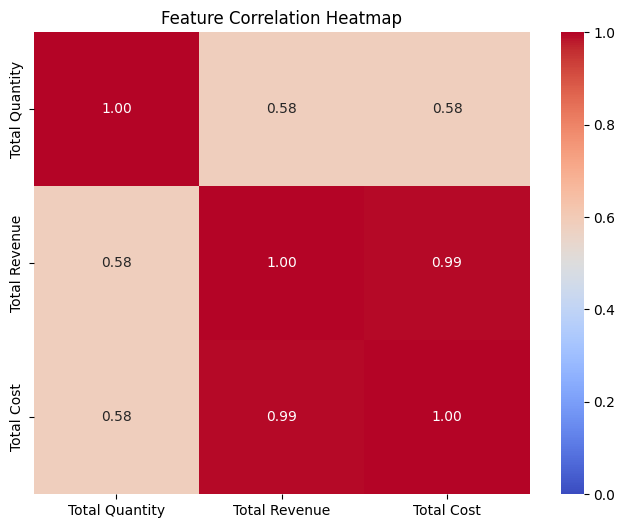

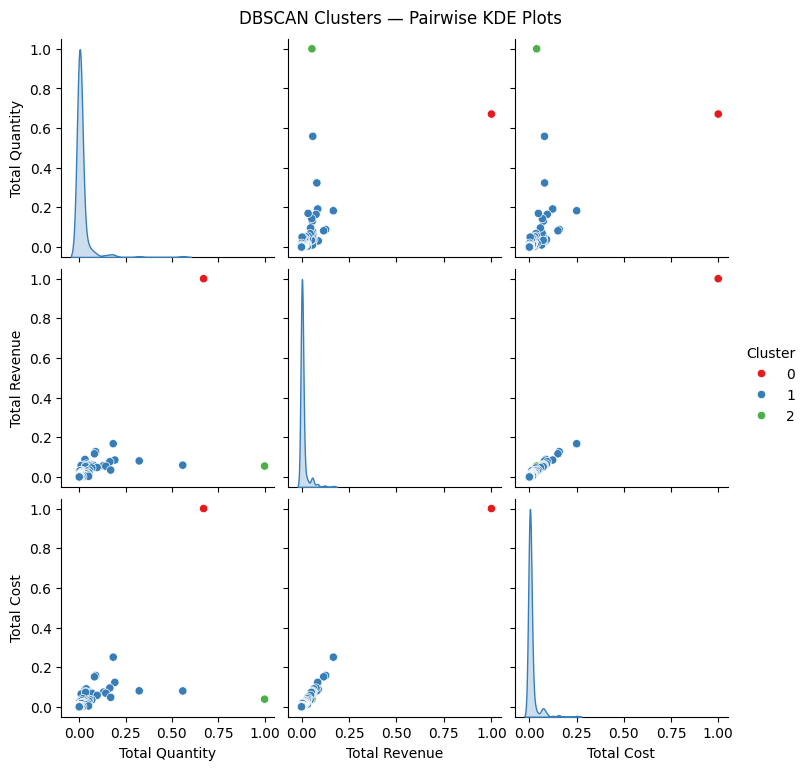

Average silhouette score: 0.9552
Davies-Bouldin Index: 0.0241
     Material  Total Quantity  Total Revenue  Total Cost Cluster
235   4225610        0.670916       1.000000    1.000000       0
203   2958512        0.183267       0.167638    0.250472       1
8     2595008        0.088446       0.127403    0.158180       1
30    2597969        0.082072       0.116622    0.151316       1
127   2952905        0.031076       0.088312    0.087341       1
..        ...             ...            ...         ...     ...
9     2595281        0.000000       0.000117    0.000244       1
10    2596278        0.000000       0.000110    0.000213       1
65    2598663        0.000000       0.000105    0.000233       1
14    2596888        0.000797       0.000103    0.000178       1
194   2957508        0.000000       0.000000    0.000135       1

[288 rows x 5 columns]


In [13]:
if __name__ == "__main__":
  # call to precluster formatting
  data = ds.directory_to_dataframe()
  data = ds.directory_to_precluster(data, sort_rev=True)

  # cluster model
  Y = cluster_heirarchy_3D(data, visualize = True)
  print(Y)

Additionally, the model can be run in 2D by truncating the total cost. This may be useful when cost and revenue are extremely linear and introduce bias to results. Use cluster_heirarchy_2D(data).